<a href="https://colab.research.google.com/github/umesh03B/ma22c048_2023_PL/blob/main/Assignment/Assignment_9/Passengers_on_the_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #  library for numerical operations
import pandas as pd # library for data manipulation and analysis
import seaborn #data visualization library

In [ ]:
t = seaborn.load_dataset('titanic') # load the Titanic dataset using Seaborn and store it in the variable t
t.head() # displays the first few rows of the dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
passenger_count = t.shape[0] # calculates the number of rows in the dataset (number of passengers)
print("The number of passengers described in the dataset is:", passenger_count)


The number of passengers described in the dataset is: 891


In [ ]:
distinct_values_count = t['who'].nunique() # it calculates the number of distinct values in the 'who' column(man, woman, child) of the dataset using nunique()
distinct_values = t['who'].unique() # and stores it in distinct_values_count

print("Number of distinct values in the 'who' column:", distinct_values_count)
print("Distinct values in the 'who' column:", distinct_values)


Number of distinct values in the 'who' column: 3
Distinct values in the 'who' column: ['man' 'woman' 'child']


In [ ]:
missing_values = t.isna().sum() # number of missing values (NaN) in each column of the dataset
print("Number of missing values in each data column:")
print(missing_values)


Number of missing values in each data column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
passengers_over_60 = t[t['age'] > 60] # elect passengers with ages over 60 and stores them in passengers_over_60
number_of_passengers_over_60 = len(passengers_over_60)
print("Number of passengers over 60 years old:", number_of_passengers_over_60)


Number of passengers over 60 years old: 22


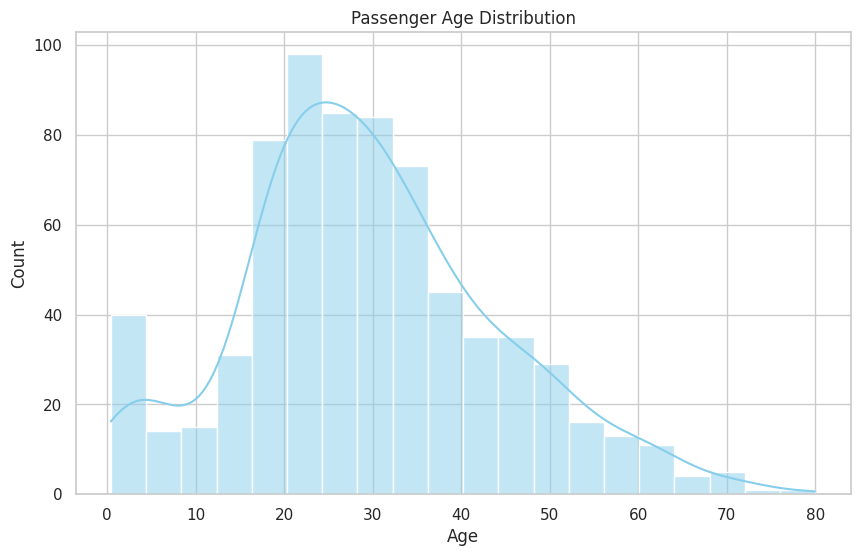

In [ ]:
import matplotlib.pyplot as plt

# Set the style of the plot
seaborn.set(style="whitegrid") #  style for Seaborn plots to "whitegrid."

# create a histogram of passenger ages using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
seaborn.histplot(data=t, x='age', kde=True, bins=20, color='skyblue')
plt.title('Passenger Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# calculates the 25th, 50th (median), and 75th percentiles of passenger ages
quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print("25th percentile:", quantiles[0.25])
print("50th percentile, median:", quantiles[0.5])
print("75th percentile:", quantiles[0.75])


25th percentile: 20.125
50th percentile, median: 28.0
75th percentile: 38.0


In [ ]:
t.dropna(subset=['embarked'], inplace=True) # emoves rows with missing values in the 'embarked' column and updates the dataset


In [ ]:
# calculates and prints the average, minimum, and maximum fares in the dataset
average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()

print("Average Fare:", average_fare)
print("Minimum Fare:", minimum_fare)
print("Maximum Fare:", maximum_fare)


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [ ]:
# Calculate the proportions of passengers in different classes
class_proportions = t['class'].value_counts(normalize=True)
print("\nProportions of Passengers in Different Classes:")
print(class_proportions)


Proportions of Passengers in Different Classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [ ]:
#groups the data by both 'class' and 'sex' and calculates the count of passengers for each combination.
gender_class_ratio = t.groupby(['class', 'sex']).size().unstack()
# calculates the female-to-male ratio for each travel class and adds it to the table
gender_class_ratio['Female-to-Male Ratio'] = gender_class_ratio['female'] / gender_class_ratio['male']
print("Female-to-Male Ratio in Each Travel Class:")
print(gender_class_ratio[['Female-to-Male Ratio']])


Female-to-Male Ratio in Each Travel Class:
sex     Female-to-Male Ratio
class                       
First               0.754098
Second              0.703704
Third               0.414986


In [ ]:
#calculates the fraction of passengers who survived by taking the mean of the 'survived' column, which contains binary values
survival_fraction = t['survived'].mean()
print("Fraction of passengers who survived:", survival_fraction)

Fraction of passengers who survived: 0.38245219347581555


In [ ]:
#calculates the fraction of passengers who survived by taking the mean of the 'survived' column, which contains binary values
survival_rates_by_gender = t.groupby('sex')['survived'].mean()
print("Survival rates by gender:")
print(survival_rates_by_gender)


Survival rates by gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [ ]:
#groups the data by 'class' and calculates the mean of the 'survived' column for each passenger class.
survival_rates_by_class = t.groupby('class')['survived'].mean()
print("Survival rates by passenger class:")
print(survival_rates_by_class)

Survival rates by passenger class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [ ]:
#Creates a pivot table that displays survival rates by passenger class and gender
# uses the 'pivot_table' function, specifying the row index ('class'), column index ('sex'), and values ('survived'), and aggregates the values using the mean
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Table of Survival Rates by Class and Gender:")
print(survival_table)


Table of Survival Rates by Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [ ]:
# creates another pivot table, but this time it combines information about
# the number of survivors ('survived') and the average fare ('fare') by gender and cabin class

table = t.pivot_table(index='sex', columns='class', values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})
print("Table with Number of Survivors and Average Fare by Gender and Cabin:")
print(table)


Table with Number of Survivors and Average Fare by Gender and Cabin:
              fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.693750  21.970121  16.118810       89     70    72
male     67.226127  19.741782  12.661633       45     17    47
